<a href="https://colab.research.google.com/github/nonyeezeh/Research-Project-Code/blob/main/code_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code 1

##### The following code makes use of forward sampling to generate data from a bayesian network. There are only 3 variables (interest rates, economic indicators, and stock prices) and no noise added.

In [ ]:
import numpy as np
import pandas as pd

# Define the number of samples
num_samples = 1000

# Define the probability distributions
def sample_A():
    # Example distribution for interest rates
    return np.random.choice(['low', 'medium', 'high'], p=[0.3, 0.4, 0.3])

def sample_B(A):
    # Example conditional distributions for economic indicators given interest rates
    if A == 'low':
        return np.random.choice(['bad', 'average', 'good'], p=[0.5, 0.3, 0.2])
    elif A == 'medium':
        return np.random.choice(['bad', 'average', 'good'], p=[0.2, 0.5, 0.3])
    else:  # A == 'high'
        return np.random.choice(['bad', 'average', 'good'], p=[0.1, 0.3, 0.6])

def sample_C(A, B):
    # Example conditional distributions for stock prices given interest rates and economic indicators
    if A == 'low' and B == 'bad':
        return np.random.choice(['decrease', 'stable', 'increase'], p=[0.7, 0.2, 0.1])
    elif A == 'low' and B == 'average':
        return np.random.choice(['decrease', 'stable', 'increase'], p=[0.5, 0.3, 0.2])
    elif A == 'low' and B == 'good':
        return np.random.choice(['decrease', 'stable', 'increase'], p=[0.4, 0.4, 0.2])
    elif A == 'medium' and B == 'bad':
        return np.random.choice(['decrease', 'stable', 'increase'], p=[0.5, 0.4, 0.1])
    elif A == 'medium' and B == 'average':
        return np.random.choice(['decrease', 'stable', 'increase'], p=[0.3, 0.5, 0.2])
    elif A == 'medium' and B == 'good':
        return np.random.choice(['decrease', 'stable', 'increase'], p=[0.2, 0.5, 0.3])
    elif A == 'high' and B == 'bad':
        return np.random.choice(['decrease', 'stable', 'increase'], p=[0.3, 0.5, 0.2])
    elif A == 'high' and B == 'average':
        return np.random.choice(['decrease', 'stable', 'increase'], p=[0.2, 0.4, 0.4])
    else:  # A == 'high' and B == 'good'
        return np.random.choice(['decrease', 'stable', 'increase'], p=[0.1, 0.3, 0.6])

# Generate samples
data = []

for _ in range(num_samples):
    A = sample_A()
    B = sample_B(A)
    C = sample_C(A, B)
    data.append((A, B, C))

# Convert to a pandas DataFrame
df = pd.DataFrame(data, columns=['Interest Rates', 'Economic Indicators', 'Stock Prices'])

# Save to a CSV file
df.to_csv('bayesian_network_data.csv', index=False)

print(df.head(10))  # Print first 10 samples to verify

  Interest Rates Economic Indicators Stock Prices
0         medium             average       stable
1            low             average     decrease
2           high             average       stable
3            low                 bad     increase
4            low                 bad     decrease
5           high                good     increase
6           high             average       stable
7         medium             average       stable
8           high             average       stable
9         medium                good     decrease


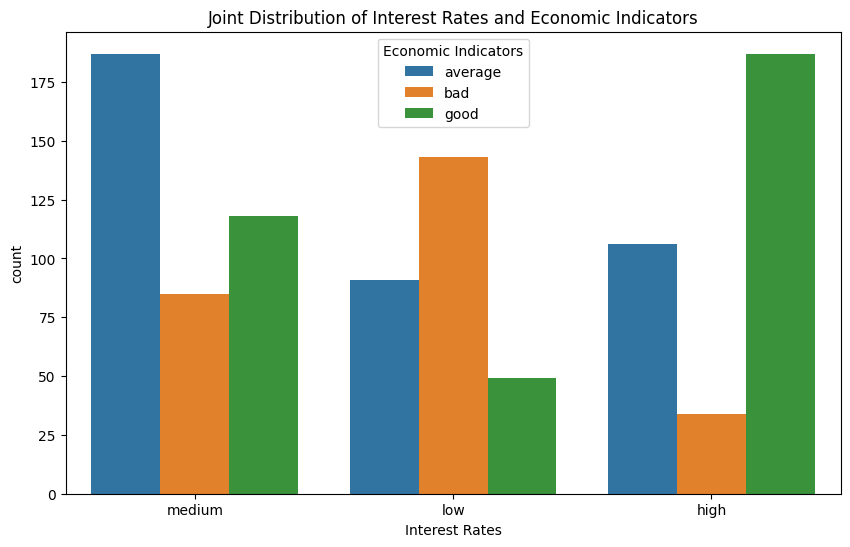

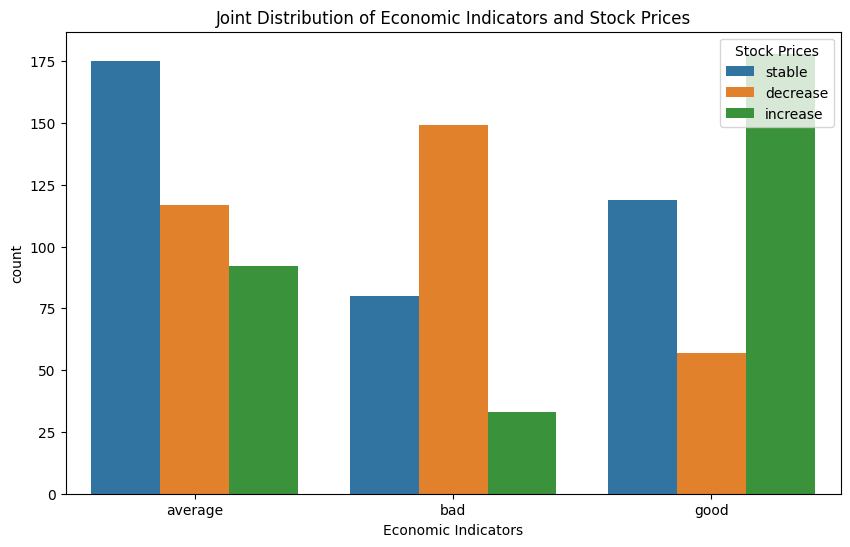

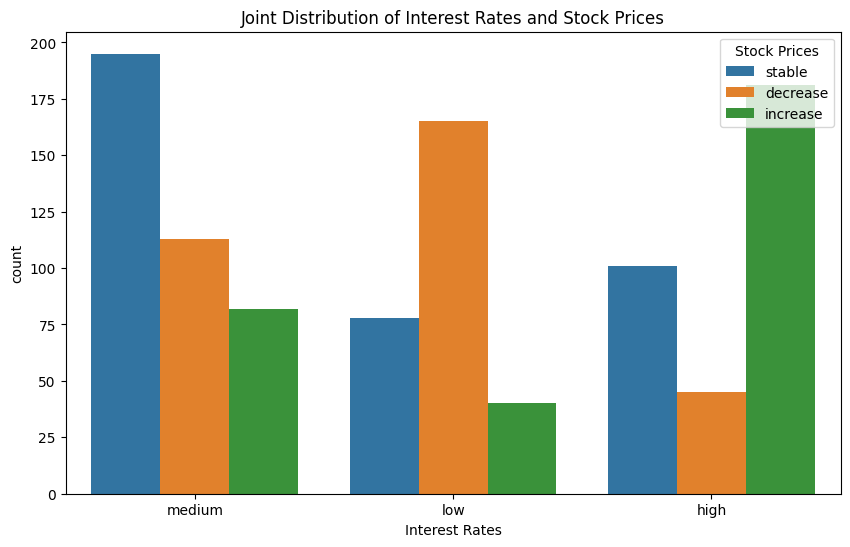

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('bayesian_network_data.csv')

# Visualize the joint distribution of Interest Rates and Economic Indicators
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Interest Rates', hue='Economic Indicators')
plt.title('Joint Distribution of Interest Rates and Economic Indicators')
plt.show()

# Visualize the joint distribution of Economic Indicators and Stock Prices
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Economic Indicators', hue='Stock Prices')
plt.title('Joint Distribution of Economic Indicators and Stock Prices')
plt.show()

# Visualize the joint distribution of Interest Rates and Stock Prices
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Interest Rates', hue='Stock Prices')
plt.title('Joint Distribution of Interest Rates and Stock Prices')
plt.show()

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Create contingency tables
contingency_table_1 = pd.crosstab(df['Interest Rates'], df['Economic Indicators'])
contingency_table_2 = pd.crosstab(df['Economic Indicators'], df['Stock Prices'])
contingency_table_3 = pd.crosstab(df['Interest Rates'], df['Stock Prices'])

# Calculate Cramér's V for the associations
cramers_v_1 = cramers_v(contingency_table_1)
cramers_v_2 = cramers_v(contingency_table_2)
cramers_v_3 = cramers_v(contingency_table_3)

print(f"Cramér's V (Interest Rates vs Economic Indicators): {cramers_v_1:.2f}")
print(f"Cramér's V (Economic Indicators vs Stock Prices): {cramers_v_2:.2f}")
print(f"Cramér's V (Interest Rates vs Stock Prices): {cramers_v_3:.2f}")

Cramér's V (Interest Rates vs Economic Indicators): 0.31
Cramér's V (Economic Indicators vs Stock Prices): 0.29
Cramér's V (Interest Rates vs Stock Prices): 0.34


In [ ]:
# Chi-Square test for Interest Rates and Economic Indicators
chi2_1, p_1, _, _ = chi2_contingency(contingency_table_1)
print(f"Chi-Square Test (Interest Rates vs Economic Indicators): chi2 = {chi2_1:.2f}, p-value = {p_1:.5f}")

# Chi-Square test for Economic Indicators and Stock Prices
chi2_2, p_2, _, _ = chi2_contingency(contingency_table_2)
print(f"Chi-Square Test (Economic Indicators vs Stock Prices): chi2 = {chi2_2:.2f}, p-value = {p_2:.5f}")

# Chi-Square test for Interest Rates and Stock Prices
chi2_3, p_3, _, _ = chi2_contingency(contingency_table_3)
print(f"Chi-Square Test (Interest Rates vs Stock Prices): chi2 = {chi2_3:.2f}, p-value = {p_3:.5f}")

Chi-Square Test (Interest Rates vs Economic Indicators): chi2 = 186.09, p-value = 0.00000
Chi-Square Test (Economic Indicators vs Stock Prices): chi2 = 168.49, p-value = 0.00000
Chi-Square Test (Interest Rates vs Stock Prices): chi2 = 226.17, p-value = 0.00000
